EE424: Rosetta Basics
===
Prof. Eric Klavins

&copy; 2019, University of Washington

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import random, math
from PIL import Image
from ipymol import viewer as pymol
import pyrosetta
import pyrosetta.rosetta as rosetta
from pyrosetta import init, Pose, pose_from_sequence, pose_from_file, get_score_function, create_score_function, PyMOLMover, ScoreFunction, MoveMap
from pyrosetta.rosetta import core, protocols
from pyrosetta.teaching import fa_atr, fa_rep, hbond_sr_bb, SwitchResidueTypeSetMover
from pyrosetta.teaching import MinMover

In [2]:
pyrosetta.init()
pymol.start()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python36.ubuntu r214 2019.11+release.fdb3942a80d fdb3942a80dd36157eaf3244e35233c2a6f09afe http://www.pyrosetta.org 2019-03-13T10:59:27
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.6/dist-packages/pyrosetta-2019.11+release.fdb3942a80d-py3.6-linux-x86_64.egg/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-1065133405 seed_offset=0 real_seed=-1065133405
core.init.random: RandomGenerator:init: Normal mode, seed=-1065133405 RG_type=mt19937


In [3]:
score = ScoreFunction()
score.set_weight(fa_atr, 0.8)
score.set_weight(fa_rep, 0.44)
score.set_weight(hbond_sr_bb, 1.17)

def random_move(pose):
    # select random residue
    res = random.randint(1, pose.total_residue())

    # select and set random torsion angle distributed around old angle
    if random.randint(0, 1) == 0:
        torsion = pose.phi(res)
        a = random.gauss(torsion, 25)
        pose.set_phi(res, a)
    else:
        torsion = pose.psi(res)
        a = random.gauss(torsion, 25)
        pose.set_psi(res, a)

core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv


In [24]:
random.randint(0, 1)
p.total_residue()

0

In [25]:
# Trp-His-Trp-Leu-Gln-Leu-Lys-Pro-Gly-Gln-Pro-Met-Tyr-OH
# p = pose_from_sequence("THTLGEYPGLPMT", "fa_standard")
# >MF(ALPHA)1 YPL187W SGDID:S000006108
p = pose_from_sequence("MRFPSIFTAVLFAASSALAAPVNTTTEDETAQIPAEAVIGYLDLEGDFDVAVLPFSNSTNNGLLFINTTIASIAAKEEGVSLDKREAEAWHWLQLKPGQPMYKREAEAEAWHWLQLKPGQPMYKREADAEAWHWLQLKPGQPMYKREADAEAWHWLQLKPGQPMY", "fa_standard")

for res in range(1, p.total_residue() + 1):
    p.set_omega(res, random.gauss(180, 25))
    
s = score(p)
scores = []
scores.append(s)
pnew = Pose()
plast = Pose()
plow = Pose()

In [85]:
if plow.total_residue() != 0:
    p = plow
    s = score(p)
    
slow = s
slast = s

for i in range(50000):
    
    slast = score(p)
    plast.assign(p)
    random_move(p)
    snew = score(p)
    
    delta = snew - slast
    
    if delta > 0:
        if random.uniform(0.0, 1.0) >= math.exp(-delta/0.25) :
            p.assign(plast)
            continue
    if snew < slow:
        slow = snew
        plow.assign(p)
        print("s low: ", slow)
        scores.append(slow)

s low:  7531.359488339391
s low:  7531.308787703123
s low:  7531.152874959025
s low:  7531.065616157384
s low:  7530.5896704076185
s low:  7530.435297518924
s low:  7530.390558529555
s low:  7530.280343678888
s low:  7530.05064572136
s low:  7530.045896895109
s low:  7529.918905242905
s low:  7529.891536928833
s low:  7529.770504291427
s low:  7529.5261309803755
s low:  7529.4233099907215
s low:  7529.137857134473
s low:  7529.097616098349
s low:  7528.446080461526
s low:  7528.42584868775
s low:  7528.392879338076
s low:  7528.258947566586
s low:  7528.092877610355
s low:  7527.706314707589
s low:  7527.418809518758
s low:  7527.291264049019
s low:  7526.88019469009
s low:  7526.8139561745475
s low:  7526.747681058219
s low:  7526.111380636658
s low:  7526.056687720713
s low:  7525.6197935284035
s low:  7525.56272250942
s low:  7525.32002172711
s low:  7525.111485511303
s low:  7524.948627636483
s low:  7524.933885762621
s low:  7524.805391161155
s low:  7524.702276300647
s low:  7524

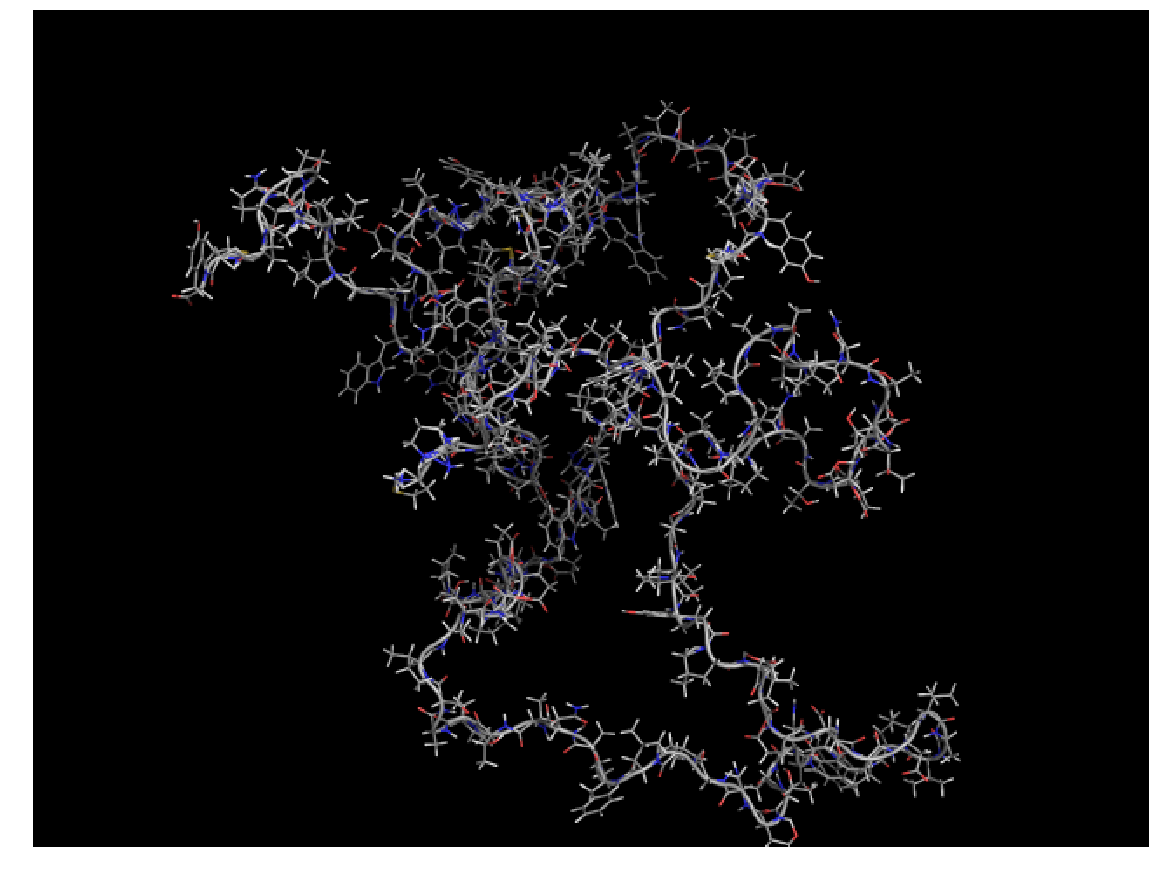

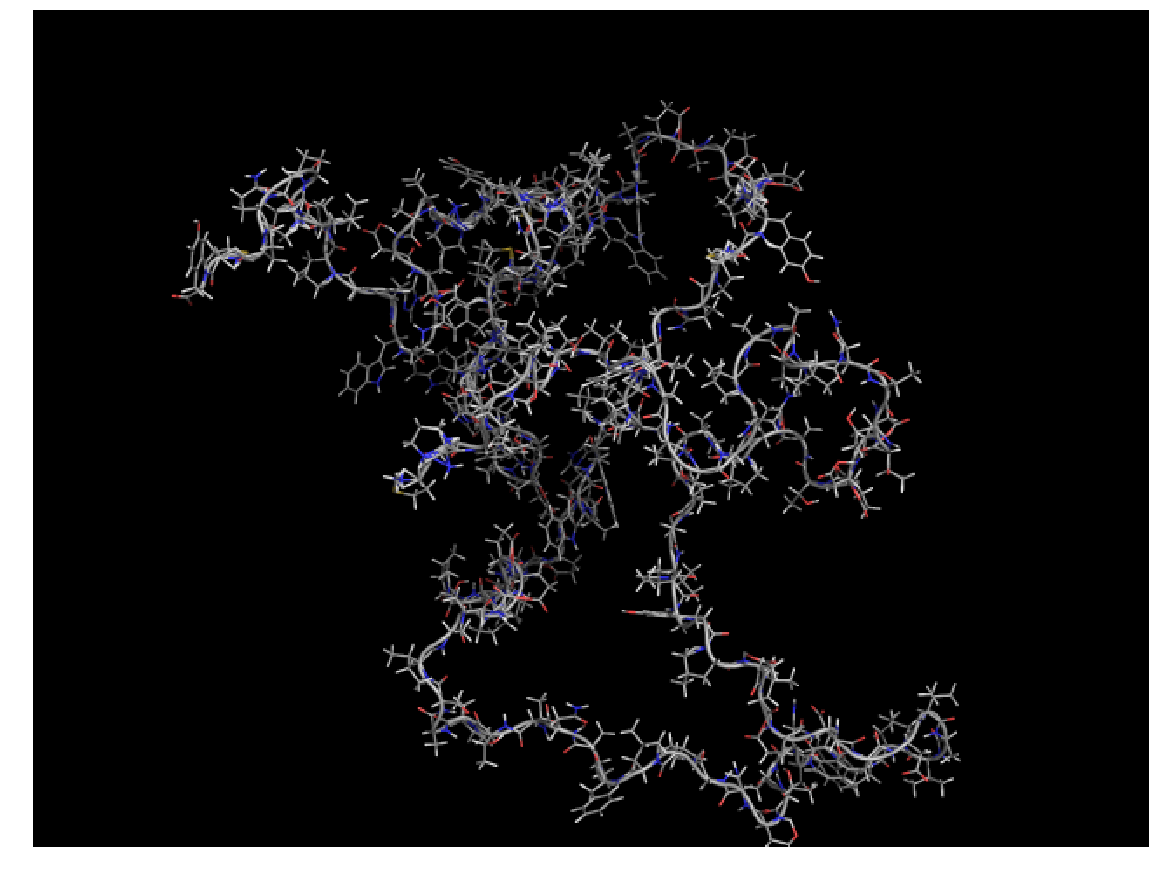

In [94]:
plow.dump_pdb("plow.pdb")
pymol.do('delete all')
pymol.do('load plow.pdb; show cartoon')
pymol.show()

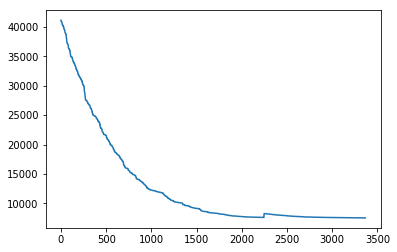

In [95]:
plt.plot(range(len(scores)), scores)

In [91]:
min_mover = MinMover()

mm4060 = MoveMap()
mm4060.set_bb_true_range(40, 60)

scorefxn = create_score_function("ref2015")

min_mover.movemap(mm4060)
min_mover.score_function(score)

In [92]:
for i in range(10000):
    min_mover.apply(plow)

In [93]:
score(plow)

7523.467927620228